# 코로나로 인한 1인가구 증가세의 변화가 어떻게 되었을까?

# 1. 배경

##  우리 나라의 1인가구 규모 비율은 매년 가파르게 증가하고 있는 추세로, 2000년과 비교하면 20년 만에 2배 수준으로 증가한 것을 확인할 수 있습니다. 
## 이에 행정시도별간 순이동자 수와 주택의 실거래가 지수 등을 사용하여 1인가구 증가세의 변화를 예측해보았습니다. 
## 이에 맞춰 기존 1인 가구의 주거환경을 통해 증가하는 1인가구를 위한 알맞은 주거환경과 알맞은 주택 개발 계획을 제시하는 것이 본 참가팀의 배경 및 목적입니다.

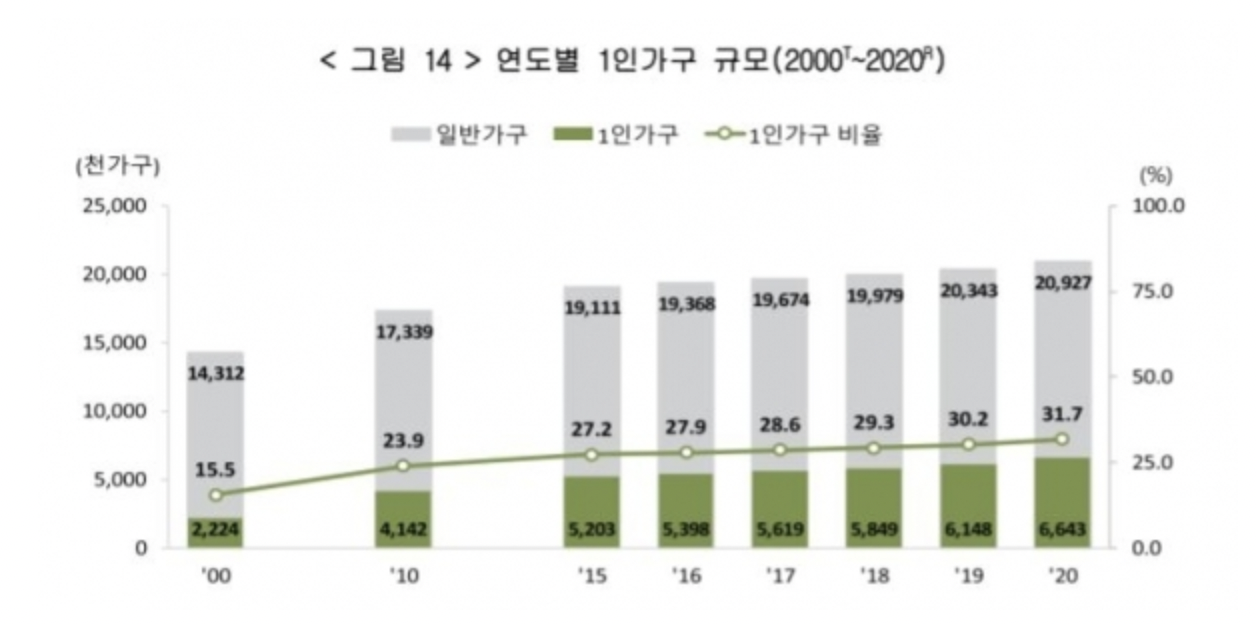

In [1]:
# 사진 불러오기
from IPython.display import Image
Image('01.png')


In [2]:
# 모듈 설치
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# 2. 목차

## 1) 1인 가구 수 변화 회귀분석
## 2) 택지 개발 현황
## 3) 추후 활용 방안 및 시사점
## 4) 정부정책 활용 방안


# 3. 활용 데이터

##     제공 데이터
##          - 부동산시장 소비심리지수 https://kremap.krihs.re.kr/
##          - 국가 통계 포털 https://kosis.kr/index/index.do

##      외부 데이터
##          - 택지정보시스템 https://openapi.jigu.go.kr/main.do
##          - 통계청 https://kostat.go.kr/portal/korea/index.action

# 4. 결과

# 1) 1인 가구 수 변화 회귀 분석

## 기간 : 2015.01~2021.06 
### 순이동자(수)와 순이동(건)과 관련이 있을 가능성이 있는 자료들을 열로 데이터 파일을 구성하였습니다.


In [3]:
# 데이터 불러오기
df = pd.read_csv('부동산.csv',thousands = ',' )
df

,년월,행정구역,부동산시장소비심리지수,출생인구수,아파트 실거래 지수,연립다세대 실거래지수,단독주택 실거래지수,총전입 (건),총전출 (건),순이동 (건),시도간전입 (건),시도간전출 (건),시도간 순이동 (건),순이동자수 (명)
0,2015.01,서울특별시,133.9,77126,87.5,95.4,95.1,76493,75663,830,32605,31775,830,3055
1,2015.02,서울특별시,136.6,76994,87.8,95.5,95.1,80777,79639,1138,33923,32785,1138,4136
2,2015.03,서울특별시,138.7,77228,88.3,95.6,95.3,101463,103602,-2139,38967,41106,-2139,9374
3,2015.04,서울특별시,139.7,77426,88.9,95.8,95.3,85057,90163,-5106,28727,33833,-5106,11117
4,2015.05,서울특별시,137.8,77730,89.5,96.1,95.4,79425,84700,-5275,25658,30933,-5275,11676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,2021.02,세종특별자치시,114.6,3278,NaN,NaN,NaN,4509,3677,832,3171,2339,832,-1497
1322,2021.03,세종특별자치시,95.8,3319,NaN,NaN,NaN,4167,3670,497,2958,2461,497,-987
1323,2021.04,세종특별자치시,94.0,3341,NaN,NaN,NaN,3302,2866,436,2224,1788,436,-721
1324,2021.05,세종특별자치시,101.8,3374,NaN,NaN,NaN,3037,2695,342,2033,1691,342,-449


### 여러 행정구역 중에서, ‘경상남도’, ‘세종특별자치시’, 그리고 ‘제주특별자치도’은 비어있는 칼럼이 많이 발견되어 삭제하였습니다.  
### 저희가 전국, 서울, 서울 외로 차이점을 찾아보고자 하였기 때문에, 해당의 유무는 크게 중요하다고 생각하지 않았습니다.

In [4]:
# NaN 값이 있는 세종특별자치시, 경상남도, 제주특별자치도 없애기
df = df.set_index('행정구역')
df = df.drop(['경상남도','세종특별자치시','제주특별자치도'])
df = df.reset_index()
df = df.drop(['시도간 순이동 (건)', '출생인구수', '총전입 (건)', '총전출 (건)', '시도간전입 (건)', '시도간전출 (건)'], axis=1)
df

,행정구역,년월,부동산시장소비심리지수,아파트 실거래 지수,연립다세대 실거래지수,단독주택 실거래지수,순이동 (건),순이동자수 (명)
0,서울특별시,2015.01,133.9,87.5,95.4,95.1,830,3055
1,서울특별시,2015.02,136.6,87.8,95.5,95.1,1138,4136
2,서울특별시,2015.03,138.7,88.3,95.6,95.3,-2139,9374
3,서울특별시,2015.04,139.7,88.9,95.8,95.3,-5106,11117
4,서울특별시,2015.05,137.8,89.5,96.1,95.4,-5275,11676
...,...,...,...,...,...,...,...,...
1087,경상북도,2021.02,121.0,91.4,92.3,107.6,-500,242
1088,경상북도,2021.03,120.4,92.1,92.1,107.8,938,-1439
1089,경상북도,2021.04,118.6,92.7,92.0,108.0,503,-1133
1090,경상북도,2021.05,118.0,93.5,92.0,108.3,509,-1327


### 저희가 다룰 행정구역은 다음과 같습니다.

In [5]:
local_list = np.array(df['행정구역'].tolist())
local_list = set(local_list)
print((local_list))

{'울산광역시', '인천광역시', '대전광역시', '서울특별시', '광주광역시', '강원도', '부산광역시', '경상북도', '충청남도', '경기도', '전라남도', '전라북도', '충청북도', '대구광역시'}


### 기본적인 Null 데이터의 처리가 완료된 모습입니다.

In [6]:
df.isnull().sum()

행정구역           0
년월             0
부동산시장소비심리지수    0
아파트 실거래 지수     0
연립다세대 실거래지수    0
단독주택 실거래지수     0
순이동 (건)        0
순이동자수 (명)      0
dtype: int64

## 연도별, 행정구역별 실태조사

### 우선 데이터를 ‘year’ 과 ‘month’ 단위로 묶여 있었는데,  ‘year’ 단위로 처리할 수 있도록 컬럼을 추가해 주었습니다.

In [7]:
df['year'] = df['년월'].map(lambda x: str(x)[:4])
df['year']

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
1087    2021
1088    2021
1089    2021
1090    2021
1091    2021
Name: year, Length: 1092, dtype: object

### 서울과 서울 외 지역의 단독주택, 아파트, 연립다세대 실거래지수를 비교해보았습니다.

In [8]:
def makeThing(k,local,column):
    if k == 1:
        district_df = df[df['행정구역']==local]
    if k == 2:
        district_df = df[df['행정구역']!=local]
        
    district_df['year'] = district_df['년월'].map(lambda x: str(x)[:4])
    district_df = round(district_df[[column,'year']].groupby('year').mean(),2)
    district_df = district_df.reset_index()

    x=district_df['year']
    y=district_df[column]
    
    return x, y
    

<ipython-input-8-7e4180e26c85>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_df['year'] = district_df['년월'].map(lambda x: str(x)[:4])


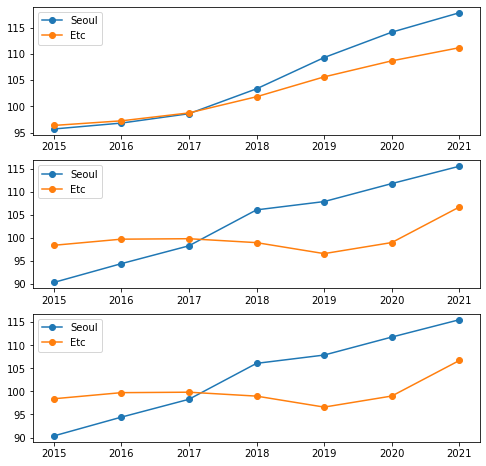

순서대로 단독주택, 아파트, 연립다세대의 연도별 실거래지수를 나타낸 표 입니다.


In [9]:
x1, y1 = makeThing(1,'서울특별시','단독주택 실거래지수')
x2, y2 = makeThing(2,'서울특별시','단독주택 실거래지수')

x3, y3 = makeThing(1,'서울특별시','아파트 실거래 지수')
x4, y4 = makeThing(2,'서울특별시','아파트 실거래 지수')

x5, y5 = makeThing(2,'서울특별시','연립다세대 실거래지수')
x6, y6 = makeThing(2,'서울특별시','연립다세대 실거래지수')
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정

ax = fig.add_subplot(3,1,1)

ax.plot(x1,y1,marker='o',label='Seoul') ## 선그래프 생성
ax.plot(x1,y2,marker='o',label='Etc')
plt.legend()


ax = fig.add_subplot(3,1,2)

ax.plot(x3,y3,marker='o',label='Seoul') ## 선그래프 생성
ax.plot(x3,y4,marker='o',label='Etc')
plt.legend()

ax = fig.add_subplot(3,1,3)

ax.plot(x3,y3,marker='o',label='Seoul') ## 선그래프 생성
ax.plot(x3,y4,marker='o',label='Etc')
plt.legend()

plt.show()
print("순서대로 단독주택, 아파트, 연립다세대의 연도별 실거래지수를 나타낸 표 입니다.")

### 2018년을 기준으로 서울의 모든 실거래지수가 급격하게 증가된 것을 볼 수 있습니다.
### 그 이유를 살펴보니 현 정부에서 2017년 11월 29일에 주거복지로드맵이라는 주거복지계획을 발표했습니다.
### 무주택 서민과 실수요자의 내 집 마련을 위해 주거공공성 강화에 나서겠다는 뜻을 밝히면서 2023년까지 공적지원 주택 100만호를 공급하고 청년·신혼부부·고령자·저소득층에 대한 주거지원을 확대하는 것을 목표로 제시하였습니다.
### 이에 따라 정부의 정책이 주거형태의 실거래지수에 막대한 영향을 끼치는 것을 확인할 수 있습니다.


## 모델 선정 및 학습 방식 선정

### 코로나 상황이 심화된 21년 데이터를 예측하는 것으로 회귀 분석 전처리를 진행하였습니다. 
### 코로나 전후의 변화를 파악하기 위하여 15년~19년 의 데이터로 예측을 진행하였고, 이에 해당하는 값과 실제 나온 데이터와의 차이를 활용하였습니다.
### 다양한 회귀분석 알고리즘(XGBoost, Linear regression, Random Forest Regression)을 동작시켜 보았고, 
### RMS(root mean square)가 가장 낮은 Random Forest Regression을 채택하였습니다.

In [10]:
def regression(X_train, X_test, y_train, y_test, recent_df, not_recent_df):
    scaler = StandardScaler()
    recent_df = scaler.fit_transform(recent_df)
    not_recent_df = scaler.fit_transform(not_recent_df)
    
    warnings.filterwarnings('ignore')

    forest_reg = RandomForestRegressor(n_jobs = -1)
    forest_reg.fit(X_train, y_train)

    y_pred = forest_reg.predict(X_test)
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    #print(rms)

    y_test = list(y_test)

    t = y_test - y_pred

    return t


### 코로나를 경계로 1인 가구가 얼마나 증가하였는지에 대해 알기 위하여 코드를 구성하였습니다. 
### 순이동 (건) 수와 순이동자수 (명) 수를 활용하면, 전체적인 가구수의 크기를 기대값으로 예측할 수 있습니다.


## 순이동 (건) 예측

In [11]:

print("순서대로 서울, 서울 외 지역. 순이동 (건) 예측\n")

df_0 = df.drop(['순이동자수 (명)'], axis=1)

# 2021년 서울특별시

district_df = df_0[df_0['행정구역']=='서울특별시']

recent_df = district_df[district_df['year']=='2021']
not_recent_df = district_df[district_df['year']!='2021']
not_recent_df = not_recent_df[not_recent_df['year']!='2020']

recent_df = recent_df.drop('행정구역',axis=1)
not_recent_df = not_recent_df.drop('행정구역',axis=1)

y_test = recent_df['순이동 (건)'] # 예측 값과의 비교 대상
X_test = recent_df.drop('순이동 (건)',axis=1)

y_train = not_recent_df['순이동 (건)']
X_train = not_recent_df.drop('순이동 (건)',axis=1)

t = regression(X_train,X_test,y_train,y_test, recent_df, not_recent_df)
print("예측 값이 실제 값 보다 평균 {:.3f} 나온 것을 확인할 수 있었습니다.".format(t.mean()))

# 2021년 서울 외 행정구역

district_df = df_0[df_0['행정구역']!='서울특별시']

recent_df = district_df[district_df['year']=='2021']
not_recent_df = district_df[district_df['year']!='2021']
not_recent_df = not_recent_df[not_recent_df['year']!='2020']

recent_df = recent_df.drop('행정구역',axis=1)
not_recent_df = not_recent_df.drop('행정구역',axis=1)

y_test = recent_df['순이동 (건)'] # 예측 값과의 비교 대상
X_test = recent_df.drop('순이동 (건)',axis=1)

y_train = not_recent_df['순이동 (건)']
X_train = not_recent_df.drop('순이동 (건)',axis=1)

t = regression(X_train,X_test,y_train,y_test, recent_df, not_recent_df)
print("예측 값이 실제 값 보다 평균 {:.3f} 나온 것을 확인할 수 있었습니다.".format(t.mean()))

순서대로 서울, 서울 외 지역. 순이동 (건) 예측

예측 값이 실제 값 보다 평균 -2166.947 나온 것을 확인할 수 있었습니다.
예측 값이 실제 값 보다 평균 28.992 나온 것을 확인할 수 있었습니다.


## 순이동 (명) 예측

In [12]:

print("순서대로 서울, 서울 외 지역. 순이동자수 (명) 예측\n")

df_1 = df.drop(['순이동 (건)'], axis=1)

# 2021년 서울특별시

district_df = df_1[df_1['행정구역']=='서울특별시']

recent_df = district_df[district_df['year']=='2021']
not_recent_df = district_df[district_df['year']!='2021']
not_recent_df = not_recent_df[not_recent_df['year']!='2020']

recent_df = recent_df.drop('행정구역',axis=1)
not_recent_df = not_recent_df.drop('행정구역',axis=1)

y_test = recent_df['순이동자수 (명)'] # 예측 값과의 비교 대상
X_test = recent_df.drop('순이동자수 (명)',axis=1)

y_train = not_recent_df['순이동자수 (명)']
X_train = not_recent_df.drop('순이동자수 (명)',axis=1)

t = regression(X_train,X_test,y_train,y_test, recent_df, not_recent_df)
print("예측 값이 실제 값 보다 평균 {:.3f} 나온 것을 확인할 수 있었습니다.".format(t.mean()))

# 2021년 서울 외 행정구역

district_df = df_1[df_1['행정구역']!='서울특별시']

recent_df = district_df[district_df['year']=='2021']
not_recent_df = district_df[district_df['year']!='2021']
not_recent_df = not_recent_df[not_recent_df['year']!='2020']

recent_df = recent_df.drop('행정구역',axis=1)
not_recent_df = not_recent_df.drop('행정구역',axis=1)

y_test = recent_df['순이동자수 (명)'] # 예측 값과의 비교 대상
X_test = recent_df.drop('순이동자수 (명)',axis=1)

y_train = not_recent_df['순이동자수 (명)']
X_train = not_recent_df.drop('순이동자수 (명)',axis=1)

t = regression(X_train,X_test,y_train,y_test, recent_df, not_recent_df)
print("예측 값이 실제 값 보다 평균 {:.3f} 나온 것을 확인할 수 있었습니다.".format(t.mean()))

순서대로 서울, 서울 외 지역. 순이동자수 (명) 예측

예측 값이 실제 값 보다 평균 4391.503 나온 것을 확인할 수 있었습니다.
예측 값이 실제 값 보다 평균 853.396 나온 것을 확인할 수 있었습니다.


## 위의 결과를 토대로 순이동자수 (명)의 경우 예상과 다르게 감소하였고, 순이동 (건)의 경우 예상과 다르게 증가한 것을 확인하였습니다.
## 이를 종합해 보면, 순이동 건수의 경우 자연수인 N 명의 단위를 가지고 있으므로 명확하게 가구당 인원수가 감소하였음을 파악할 수 있습니다.


In [13]:
corr_0 = df_0.corr(method = 'pearson') 
print(corr_0)

                   년월  부동산시장소비심리지수  아파트 실거래 지수  연립다세대 실거래지수  단독주택 실거래지수  \
년월           1.000000    -0.122726    0.187659     0.040611    0.902837   
부동산시장소비심리지수 -0.122726     1.000000    0.177770     0.070805   -0.006741   
아파트 실거래 지수   0.187659     0.177770    1.000000     0.850554    0.395260   
연립다세대 실거래지수  0.040611     0.070805    0.850554     1.000000    0.273775   
단독주택 실거래지수   0.902837    -0.006741    0.395260     0.273775    1.000000   
순이동 (건)      0.037169     0.005055    0.112289     0.207920    0.046353   

              순이동 (건)  
년월           0.037169  
부동산시장소비심리지수  0.005055  
아파트 실거래 지수   0.112289  
연립다세대 실거래지수  0.207920  
단독주택 실거래지수   0.046353  
순이동 (건)      1.000000  


In [14]:
corr_1 = df_1.corr(method = 'pearson') 
print(corr_1)

                   년월  부동산시장소비심리지수  아파트 실거래 지수  연립다세대 실거래지수  단독주택 실거래지수  \
년월           1.000000    -0.122726    0.187659     0.040611    0.902837   
부동산시장소비심리지수 -0.122726     1.000000    0.177770     0.070805   -0.006741   
아파트 실거래 지수   0.187659     0.177770    1.000000     0.850554    0.395260   
연립다세대 실거래지수  0.040611     0.070805    0.850554     1.000000    0.273775   
단독주택 실거래지수   0.902837    -0.006741    0.395260     0.273775    1.000000   
순이동자수 (명)   -0.032799     0.056774   -0.048425    -0.133644   -0.017260   

             순이동자수 (명)  
년월           -0.032799  
부동산시장소비심리지수   0.056774  
아파트 실거래 지수   -0.048425  
연립다세대 실거래지수  -0.133644  
단독주택 실거래지수   -0.017260  
순이동자수 (명)     1.000000  


### 기존의 자료에서는 순이동 (건) 과 관련된 컬럼 중에서 총전출 (건), 총전입 (건)과 같은 상관계수가 높았던 데이터들이 있었기 때문에, 
### 다중공선성 문제가 발생하여 과대적합의 문제가 발생함을 확인하였습니다. 
### 따라서 상관계수가 높은 칼럼들을 제거하여 과대적합을 피할 수 있도록 하였습니다. 이후, PCA 분석 결과를 비교하여 수치의 개선을 확인하였습니다.

## Before 
### 주축1 = 0.36047, 주축2 = 0.21462,  주축3 = 0.14537
## After  
### 주축1 = 0.42579, 주축2 = 0.27236 , 주축3 = 0.19405

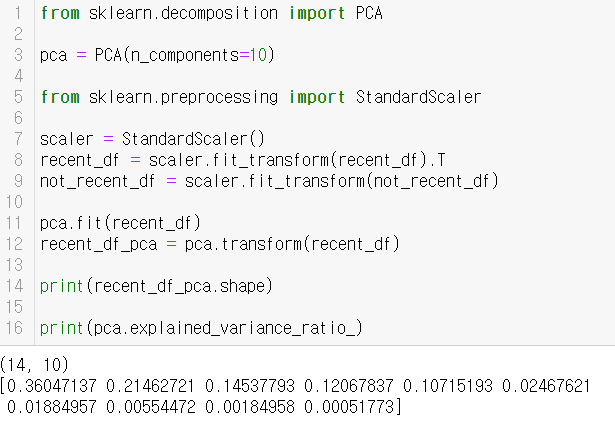

In [15]:
Image('02.png')

In [16]:
pca = PCA(n_components=5)

scaler = StandardScaler()
recent_df = scaler.fit_transform(recent_df).T
not_recent_df = scaler.fit_transform(not_recent_df)

pca.fit(recent_df)
recent_df_pca = pca.transform(recent_df)

print(recent_df_pca.shape)

print(pca.explained_variance_ratio_)

(7, 5)
[0.42579464 0.27236052 0.19405615 0.05762638 0.04239452]


# 2) 택지 개발 현황 지역별 분석

## 지역별 개발 계획

### 앞선 결과에 따라서, 전국적인 택지 개발 계획을 확인하여 1인 가구의 순이동에 유의미한 결과를 줄 수 있는 아파트와 연립 다세대의 개발 현황,
### 전국적인 개발 분포를 확인해보고자 데이터를 수집해 보았습니다.

In [17]:
plan_df = pd.read_csv('BLS5_DSTRC_HOUSE.csv',thousands = ',',encoding='CP949')
plan_df

,지구지정번호,지구명,블록명,블록번호,주택유형코드,주택유형코드명,블록면적,주택규모코드,주택규모코드명,계획인구수,...,용적율,평균평형,층고구분코드,층고구분코드명,공급유형코드,공급유형코드명,임대기간코드,임대기간코드명,등록일시,수정일시
0,41450KH2009001,하남미사 공공주택지구,A21,1,260,공동주택,72755.2,85.0,85초과,3055.0,...,210.0,125,NaN,NaN,SA,분양,NaN,NaN,2018-11-29 17:03:04.0,NaN
1,41115MX2004001,광교지구 택지개발사업,A21,1,260,공동주택,36500.0,NaN,NaN,1755.0,...,210.0,109.09,NaN,NaN,SA,분양,NaN,NaN,2017-04-14 09:20:28.0,NaN
2,41480MX2001001,파주운정지구 택지개발사업,A21,1,260,공동주택,41177.1,85.0,85초과,1205.0,...,188.0,120,HR,고층,NaN,NaN,NaN,NaN,2015-02-26 00:00:00.0,NaN
3,41115MX2004001,광교지구 택지개발사업,A21,2,260,공동주택,34520.7,NaN,NaN,1215.0,...,210.0,148.76,NaN,NaN,SA,분양,NaN,NaN,2017-04-14 09:20:28.0,NaN
4,28260KL2013001,인천경제자유구역 청라국제도시,A21,141,260,공동주택,78614.1,85.0,85초과,2396.0,...,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-24 18:04:33.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10179,11650DA2009001,서울내곡 공공주택지구,2BL,566,260,공동주택,6951.7,60.0,60이하,467.0,...,250.0,80,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 18:03:55.0,NaN
10180,11650DA2009001,서울내곡 공공주택지구,2BL,567,260,공동주택,2827.4,60.0,60이하,190.0,...,250.0,80,NaN,NaN,SA,분양,NaN,NaN,2020-01-31 18:03:55.0,NaN
10181,11650DA2009001,서울내곡 공공주택지구,2BL,568,260,공동주택,8175.6,68.0,60-85,388.0,...,250.0,105,NaN,NaN,SA,분양,NaN,NaN,2020-01-31 18:03:55.0,NaN
10182,48250PV2010002,주촌선천지구 도시개발사업,2공-1,1,260,공동주택,78079.0,NaN,NaN,NaN,...,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-27 19:58:20.0,NaN


## 필요한 column 추출

### 저희가 필요한 데이터는 지역별로 어떤 주택유형의 개발 계획이 어느 시기에 있는지 알아보기 위하여 ‘지구명', ‘주택유형코드명', ‘등록일시'의 column을 추출하여 보았습니다. 

In [18]:
plan_df=plan_df[['지구명','주택유형코드명','등록일시']]
plan_df

,지구명,주택유형코드명,등록일시
0,하남미사 공공주택지구,공동주택,2018-11-29 17:03:04.0
1,광교지구 택지개발사업,공동주택,2017-04-14 09:20:28.0
2,파주운정지구 택지개발사업,공동주택,2015-02-26 00:00:00.0
3,광교지구 택지개발사업,공동주택,2017-04-14 09:20:28.0
4,인천경제자유구역 청라국제도시,공동주택,2020-06-24 18:04:33.0
...,...,...,...
10179,서울내곡 공공주택지구,공동주택,2020-01-31 18:03:55.0
10180,서울내곡 공공주택지구,공동주택,2020-01-31 18:03:55.0
10181,서울내곡 공공주택지구,공동주택,2020-01-31 18:03:55.0
10182,주촌선천지구 도시개발사업,공동주택,2018-04-27 19:58:20.0


### 현재 택지 개발 계획을 파악하고자 2021년도 택지 개발 계획 데이터를 추출했습니다.

In [19]:
plan_df['year'] = plan_df['등록일시'].map(lambda x: str(x)[:4])
plan_2021_df=plan_df[plan_df['year']=='2021']
plan_2021_df

,지구명,주택유형코드명,등록일시,year
595,과천지식정보타운 공공주택지구,공동주택,2021-02-22 16:23:47.0,2021
596,과천지식정보타운 공공주택지구,공동주택,2021-02-22 16:23:47.0,2021
597,과천지식정보타운 공공주택지구,공동주택,2021-02-22 16:23:47.0,2021
598,과천지식정보타운 공공주택지구,공동주택,2021-02-22 16:23:47.0,2021
599,과천지식정보타운 공공주택지구,공동주택,2021-02-22 16:23:47.0,2021
...,...,...,...,...
10137,파주운정3 택지개발계획,공동주택,2021-02-22 16:23:40.0,2021
10138,파주운정3 택지개발계획,공동주택,2021-02-22 16:23:40.0,2021
10139,파주운정3 택지개발계획,공동주택,2021-02-22 16:23:40.0,2021
10140,파주운정3 택지개발계획,공동주택,2021-02-22 16:23:40.0,2021


## 현재 개발 중인 주거공간의 유형

### 2021년도 개발 계획이 있는 주거공간의 유형은 공동주택, 단독주택, 주상복합, 연립, 아파트, 도시형생활주택, 복합단지로 이루어져있는 것을 알 수 있습니다.

In [20]:
plan_df['주택유형코드명'].unique()

array(['공동주택', '주상복합', '단독주택', '도시형생활주택', '연립', '아파트', '복합단지', '근린생활',
       '다세대주택', '연립주택'], dtype=object)

## 2021년 단독주택 건설 계획이 있는 지역

In [21]:
single_house_df = plan_2021_df[plan_2021_df['주택유형코드명']=='단독주택']
single_house_df.head()

,지구명,주택유형코드명,등록일시,year
1378,춘천 학곡지구 도시개발구역,단독주택,2021-07-28 15:55:18.0,2021
1382,여주 능서역세권 도시개발구역,단독주택,2021-07-28 15:55:19.0,2021
1384,충북경제자유구역 오송 바이오폴리스지구(오송2단지),단독주택,2021-07-28 15:55:19.0,2021
1395,탕정 일반산업단지,단독주택,2021-07-28 15:55:19.0,2021
1405,음성 대소 삼정지구 도시개발구역,단독주택,2021-07-28 15:55:21.0,2021


## 2021년 연립다세대 건설 계획이 있는 지역

### 주거공간의 유형 중에서 공동주택, 주상복합, 연립, 도시형생활주택, 복합단지를 연립다세대로 분류하였습니다.

In [22]:
n_apt = plan_2021_df['주택유형코드명'] !='아파트'
n_housing = plan_2021_df['주택유형코드명'] !='단독주택'
housing_df=plan_2021_df[n_apt & n_housing]
housing_df

,지구명,주택유형코드명,등록일시,year
595,과천지식정보타운 공공주택지구,공동주택,2021-02-22 16:23:47.0,2021
596,과천지식정보타운 공공주택지구,공동주택,2021-02-22 16:23:47.0,2021
597,과천지식정보타운 공공주택지구,공동주택,2021-02-22 16:23:47.0,2021
598,과천지식정보타운 공공주택지구,공동주택,2021-02-22 16:23:47.0,2021
599,과천지식정보타운 공공주택지구,공동주택,2021-02-22 16:23:47.0,2021
...,...,...,...,...
10137,파주운정3 택지개발계획,공동주택,2021-02-22 16:23:40.0,2021
10138,파주운정3 택지개발계획,공동주택,2021-02-22 16:23:40.0,2021
10139,파주운정3 택지개발계획,공동주택,2021-02-22 16:23:40.0,2021
10140,파주운정3 택지개발계획,공동주택,2021-02-22 16:23:40.0,2021


## 2021년 아파트 건설 계획이 있는 지역

In [23]:
apt_df = plan_2021_df[plan_2021_df['주택유형코드명']=='아파트']
apt_df.head()

,지구명,주택유형코드명,등록일시,year
1779,부산진해경제자유구역 명지지구,아파트,2021-07-28 15:55:36.0,2021
1784,부산진해경제자유구역 명지지구,아파트,2021-07-28 15:55:36.0,2021
1785,부산진해경제자유구역 명지지구,아파트,2021-07-28 15:55:36.0,2021
1787,부산진해경제자유구역 명지지구,아파트,2021-07-28 15:55:36.0,2021
1789,부산진해경제자유구역 명지지구,아파트,2021-07-28 15:55:36.0,2021


## 택지개발현황 데이터 전처리

In [24]:
new_name = {'가평 대곡2지구 도시개발구역':'경기도','가평 대곡지구 도시개발구역':'경기도','가평 읍내2지구 도시개발구역':'경기도',
'강동구 길동 367-1 공공지원민간임대주택(역세권 청년주택) 공급촉진지구':'서울','강동구 길동 368-7 공공지원민간임대주택(역세권 청년주택) 공급촉진지구':'서울',
'강서구 공항동 공공지원민간임대주택(역세권 청년주택) 공급촉진지구':'서울','강원도 남원주역세권 개발 투자선도지구':'강원도','경산하양 택지개발사업':'경상북도',
'고덕 국제화계획지구 및 택지개발지구':'서울','고양덕은 도시개발사업':'경기도','고양지축 공공주택지구':'경기도','고창황산 공공주택지구':'전라북도','곤지암역세권 도시개발구역':'경기도',
'공도 승두지구 도시개발구역':'경기도','공도 양기2지구 도시개발구역':'경기도','공도 용두2지구 도시개발구역':'경기도','과천주암 공공지원민간임대주택 공급촉진지구':'경기도',
'과천지식정보타운 공공주택지구':'경기도','광양 성황 도이지구 도시개발사업 ':'전라남도','광주선운2 공공주택지구':'광주광역시','광주역세권 도시개발사업':'경기도','광주연구개발특구 첨단3지구':'광주광역시',
'구로구 개봉동 403-29일원 공공지원민간임대주택 공급':'서울','군포대야미 공공주택지구':'경기도','금호워터폴리스':'대구광역시','김천 송천지구 택지개발사업':'경상북도',
'김포 한강시네폴리스 일반산업단지':'경기도','김해진례 공공지원민간임대주택 공급촉진지구':'경상남도','남양주진접2 공공주택지구':'경기도',
'노원구 상계동 1049-71일원 공공지원민간임대주택(역세권 청년주택) 공급촉진지구':'서울','당진 수청2지구 도시개발구역':'충청남도','당진 읍내1지구 도시개발구역':'충청남도',
'대구도남 공공주택지구':'대구광역시','대구연경 공공주택지구':'대구광역시','대구연호 공공주택지구':'대구광역시','대전대덕 공공지원민간임대주택 공급촉진지구':'대전광역시',
'대전장대 공공주택지구':'대전광역시','대전학하 공공지원민간임대주택 공급촉진지구':'대전광역시','동대문구 장안동 465-4번지 일원 공공지원민간임대주택(역세권 청년주택) 공급촉진지구':'서울',
'동래 명장 공공지원민간임대주택 공급촉진지구':'부산광역시','목포 임성지구 도시개발구역':'전라남도','반월특수지역개발구역 중 시화2단계(송산그린시티) 개발사업':'경기도',
'부산장안지구 택지개발사업':'부산광역시','부산진해경제자유구역 명지지구':'부산광역시','부천옥길 공공주택지구':'경기도','사파지구 도시개발구역':'경상남도','서울독산 기업형임대주택 공급촉진지구':'서울',
'서울양원 공공주택지구':'서울','서울오금 공공주택지구':'서울','서울천왕2 국민임대주택단지예정지구':'서울','서울항동 공공주택지구':'서울','석수골 역세권 도시개발사업':'경기도',
'성남고등 공공주택지구':'경기도','성남금토 공공주택지구':'경기도','성남복정1 공공주택지구':'경기도','시흥은계 공공주택지구':'경기도','시흥장현 공공주택지구':'경기도',
'신경주역세권 지역개발사업':'경상북도','신진주역세권 도시개발사업':'경상남도','아산탕정 택지개발예정지구':'충청남도','안성삼죽 공공주택지구':'경기도','양주신도시(옥정) 택지개발사업':
'경기도','양주신도시(회천) 택지개발사업':'경기도','여수 죽림 1지구 도시개발구역':'전라남도','여주 능서역세권 도시개발구역':'경기도','여주 태평지구 도시개발구역':'경기도',
'여주 현암지구 도시개발사업':'경기도','여주역세권 도시개발구역':'경기도','영등포구 신길동 3608번지 일원 역세권 청년주택':'서울','영등포구 신길동 역세권 청년주택(공공지원민간임대주택) 공급촉진지구':'서울',
'영암 해남 관광레저형 기업도시(구성지구) 개발사업 ':'전라남도', '영주 휴천지구 도시개발구역':'경상북도','예산 예당일반산업단지':'충청남도','오산세교2지구 택지개발사업':'경기도',
'완주삼봉 공공주택지구':'전라북도','용인영덕 공공지원민간임대주택 공급촉진지구':'경기도','울산태화강변 공공주택지구':'울산광역시','원주 단구지구 도시개발사업':'강원도',
'위례 택지개발사업 개발계획':'경기도','은평구 불광동 302-13 공공지원민간임대주택(역세권 청년주택) 공급촉진지구':'서울','음성 대소 삼정지구 도시개발구역':'충청북도',
'의왕 백운밸리 도시개발구역':'경기도','의왕고천 공공주택지구':'경기도','의왕월암 공공주택지구':'경기도','의왕청계2 공공주택지구':'경기도',
'의정부고산 공공주택지구':'경기도','의정부호원 공공지원민간임대주택 공급촉진지구':'경기도','이천 송정1지구 도시개발구역':'경기도','이천 진암지구 도시개발구역':'경기도',
'이천중리 택지개발지구':'경기도','익산 부송4지구 도시개발구역':'전라북도','익산 송학 공공지원민간임대주택 공급촉진지구':'전라북도','익산소라 공공지원민간임대주택 공급촉진지구':'전라북도',
'익산인화 공공주택지구':'전라북도','인천검단지구 택지개발사업':'인천광역시','인천경제자유구역 영종국제도시 영종하늘도시':'인천광역시','인천계양 테크노밸리 공공주택지구':'인천광역시',
'종전부동산 이목지구 도시개발구역':'경기도','죽산지구 도시개발구역':'경기도','중랑구 상봉동 118-8번지 일원 공공지원민간임대주택 ':'서울','진천 성석지구 도시개발구역':'충청북도',
'진천문백 공공주택지구':'충청북도','창녕말흘 공공주택지구':'경상남도','창원안민 공공지원 민간임대주택 공급촉진지구':'경상남도','천안 청당 새텃말지구 도시개발사업':'충청남도',
'청주동남지구 택지개발사업':'충청북도','춘천 삼천지구 도시개발구역':'강원도','춘천 학곡지구 도시개발구역':'강원도','충북경제자유구역 오송 바이오폴리스지구(오송2단지)':'충청북도',
'충주 안림지구 도시개발구역':'충청북도','탕정 일반산업단지':'충청남도','파주운정3 택지개발계획':'경기도','평택 브레인시티 일반산업단지':'경기도','평택 세교지구 도시개발사업':'경기도',
'평택 안정 공공지원민간임대주택 공급촉진지구':'경기도','포항블루밸리 국가산업단지':'경상북도','하남감일 공공주택지구':'경기도','함평 기각지구 도시개발사업':'전라남도', 
'홍천 희망지구 도시개발사업':'강원도','화성병점복합타운 도시개발구역':'경기도','화성비봉 공공주택지구':'경기도','화성어천 공공주택지구':'경기도','화성태안3지구 택지개발사업':'경기도'}
new_name

{'가평 대곡2지구 도시개발구역': '경기도',
 '가평 대곡지구 도시개발구역': '경기도',
 '가평 읍내2지구 도시개발구역': '경기도',
 '강동구 길동 367-1 공공지원민간임대주택(역세권 청년주택) 공급촉진지구': '서울',
 '강동구 길동 368-7 공공지원민간임대주택(역세권 청년주택) 공급촉진지구': '서울',
 '강서구 공항동 공공지원민간임대주택(역세권 청년주택) 공급촉진지구': '서울',
 '강원도 남원주역세권 개발 투자선도지구': '강원도',
 '경산하양 택지개발사업': '경상북도',
 '고덕 국제화계획지구 및 택지개발지구': '서울',
 '고양덕은 도시개발사업': '경기도',
 '고양지축 공공주택지구': '경기도',
 '고창황산 공공주택지구': '전라북도',
 '곤지암역세권 도시개발구역': '경기도',
 '공도 승두지구 도시개발구역': '경기도',
 '공도 양기2지구 도시개발구역': '경기도',
 '공도 용두2지구 도시개발구역': '경기도',
 '과천주암 공공지원민간임대주택 공급촉진지구': '경기도',
 '과천지식정보타운 공공주택지구': '경기도',
 '광양 성황 도이지구 도시개발사업 ': '전라남도',
 '광주선운2 공공주택지구': '광주광역시',
 '광주역세권 도시개발사업': '경기도',
 '광주연구개발특구 첨단3지구': '광주광역시',
 '구로구 개봉동 403-29일원 공공지원민간임대주택 공급': '서울',
 '군포대야미 공공주택지구': '경기도',
 '금호워터폴리스': '대구광역시',
 '김천 송천지구 택지개발사업': '경상북도',
 '김포 한강시네폴리스 일반산업단지': '경기도',
 '김해진례 공공지원민간임대주택 공급촉진지구': '경상남도',
 '남양주진접2 공공주택지구': '경기도',
 '노원구 상계동 1049-71일원 공공지원민간임대주택(역세권 청년주택) 공급촉진지구': '서울',
 '당진 수청2지구 도시개발구역': '충청남도',
 '당진 읍내1지구 도시개발구역': '충청남도',
 '대구도남 공공주택지구': '대구광역시',
 '

## 아파트유형 지역별로 카운팅

In [25]:
from collections import defaultdict

apt_cnt = defaultdict(int)

for name in apt_df['지구명']:
    apt_cnt[name] += 1

sort_plan=sorted(apt_cnt.items(),key=lambda x: x[0])

land_dict = dict()
for name,cnt in sort_plan:
    land_dict[name] = cnt

In [26]:
temp_df =pd.DataFrame(list(new_name.items()),columns=['fullname', 'name'])
temp_df=temp_df.reset_index()

cnt_df =pd.DataFrame(list(land_dict.items()),columns=['fullname', 'count'])
cnt_df=cnt_df.reset_index()

final = pd.merge(temp_df,cnt_df, on='fullname', how='inner')
final[['fullname','name','count']]

,fullname,name,count
0,광주역세권 도시개발사업,경기도,2
1,부산진해경제자유구역 명지지구,부산광역시,22
2,사파지구 도시개발구역,경상남도,1
3,신진주역세권 도시개발사업,경상남도,7


In [27]:
name_cnt = defaultdict(int)

for name in final['name']:
    name_cnt[name] += 1

sort_name_cnt=sorted(name_cnt.items(),key=lambda x: x[0])

land_cnt_dict = dict()
for name,cnt in sort_name_cnt:
    land_cnt_dict[name] = cnt
    
land_cnt_sort = sorted(land_cnt_dict.items(), key = lambda x: x[1], reverse=True)
area_count_df =pd.DataFrame(land_cnt_sort,columns=['area_name', 'count'])
area_count_df

,area_name,count
0,경상남도,2
1,경기도,1
2,부산광역시,1


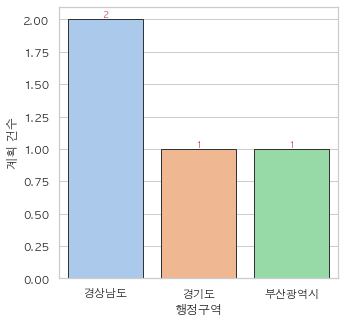

In [41]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

x=area_count_df['area_name']
y=area_count_df['count']
plt.figure(figsize=(5,5))
for i, v in enumerate(x):
        plt.text(i, round(y[i],2), round(y[i],2),      
                fontsize = 9, 
                color='r',
                horizontalalignment='center',  
                verticalalignment='bottom')

sns.barplot(data = area_count_df, 
                x='area_name',
                y='count', 
                palette='pastel',
                edgecolor=".2",
                linewidth=1 
                )

plt.xlabel('행정구역')
plt.ylabel('계획 건수')
plt.show()

## 연립다세대유형 지역별로 카운팅

In [29]:
h_cnt = defaultdict(int)

for name in housing_df['지구명']:
    h_cnt[name] += 1

s_plan=sorted(h_cnt.items(),key=lambda x: x[0])

h_land_dict = dict()
for name,cnt in s_plan:
    h_land_dict[name] = cnt

In [30]:
temp_2_df =pd.DataFrame(list(new_name.items()),columns=['fullname', 'name'])

cnt_2_df =pd.DataFrame(list(h_land_dict.items()),columns=['fullname', 'count'])

final_2 = pd.merge(temp_2_df,cnt_2_df, on='fullname', how='inner')
final_2[['fullname','name','count']]

,fullname,name,count
0,가평 대곡2지구 도시개발구역,경기도,1
1,가평 대곡지구 도시개발구역,경기도,1
2,가평 읍내2지구 도시개발구역,경기도,1
3,강동구 길동 367-1 공공지원민간임대주택(역세권 청년주택) 공급촉진지구,서울,1
4,강동구 길동 368-7 공공지원민간임대주택(역세권 청년주택) 공급촉진지구,서울,1
...,...,...,...
118,홍천 희망지구 도시개발사업,강원도,1
119,화성병점복합타운 도시개발구역,경기도,3
120,화성비봉 공공주택지구,경기도,12
121,화성어천 공공주택지구,경기도,10


In [31]:
h_name_cnt = defaultdict(int)

for name in final_2['name']:
    h_name_cnt[name] += 1

h_sort_name_cnt=sorted(h_name_cnt.items(),key=lambda x: x[0])

h_land_cnt_dict = dict()
for name,cnt in h_sort_name_cnt:
    h_land_cnt_dict[name] = cnt
    
h_land_cnt_sort = sorted(h_land_cnt_dict.items(), key = lambda x: x[1], reverse=True)
h_area_count_df =pd.DataFrame(h_land_cnt_sort,columns=['area_name', 'count'])
h_area_count_df

,area_name,count
0,경기도,53
1,서울,16
2,전라북도,6
3,충청남도,6
4,충청북도,6
5,강원도,5
6,경상남도,5
7,경상북도,5
8,전라남도,5
9,대구광역시,4


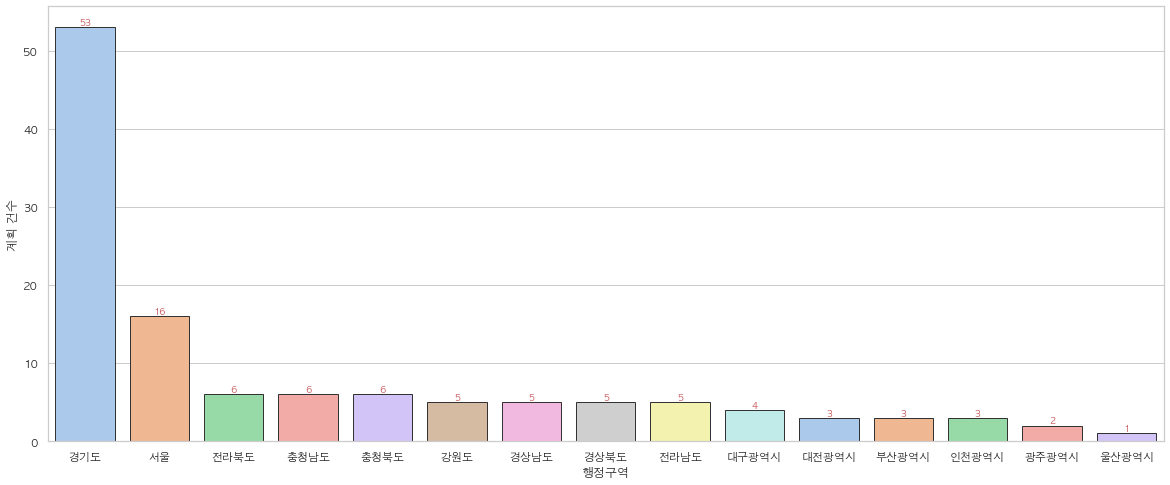

In [32]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

x=h_area_count_df['area_name']
y=h_area_count_df['count']
plt.figure(figsize=(20,8))
for i, v in enumerate(x):
        plt.text(i, round(y[i],2), round(y[i],2),      
                fontsize = 9, 
                color='r',
                horizontalalignment='center',  
                verticalalignment='bottom')

sns.barplot(data = h_area_count_df, 
                x='area_name',
                y='count', 
                palette='pastel',
                edgecolor=".2",
                linewidth=1 
                )

plt.xlabel('행정구역')
plt.ylabel('계획 건수')
plt.show()

## 단독주택유형 지역별로 카운팅

In [33]:
from collections import defaultdict

single_house_cnt = defaultdict(int)

for name in single_house_df['지구명']:
    single_house_cnt[name] += 1

single_sort_plan=sorted(single_house_cnt.items(),key=lambda x: x[0])

single_land_dict = dict()
for name,cnt in single_sort_plan:
    single_land_dict[name] = cnt

In [34]:
temp_3_df =pd.DataFrame(list(new_name.items()),columns=['fullname', 'name'])

cnt_3_df =pd.DataFrame(list(single_land_dict.items()),columns=['fullname', 'count'])

final_3 = pd.merge(temp_3_df,cnt_3_df, on='fullname', how='inner')
final_3[['fullname','name','count']]

,fullname,name,count
0,강원도 남원주역세권 개발 투자선도지구,강원도,1
1,경산하양 택지개발사업,경상북도,1
2,고덕 국제화계획지구 및 택지개발지구,서울,1
3,고양덕은 도시개발사업,경기도,1
4,고양지축 공공주택지구,경기도,1
...,...,...,...
69,포항블루밸리 국가산업단지,경상북도,1
70,하남감일 공공주택지구,경기도,1
71,화성비봉 공공주택지구,경기도,1
72,화성어천 공공주택지구,경기도,1


In [35]:
single_name_cnt = defaultdict(int)

for name in final_3['name']:
    single_name_cnt[name] += 1

single_sort_name_cnt=sorted(single_name_cnt.items(),key=lambda x: x[0])

single_land_cnt_dict = dict()
for name,cnt in single_sort_name_cnt:
    single_land_cnt_dict[name] = cnt
    
single_land_cnt_sort = sorted(single_land_cnt_dict.items(), key = lambda x: x[1], reverse=True)
single_area_count_df =pd.DataFrame(single_land_cnt_sort,columns=['area_name', 'count'])
single_area_count_df

,area_name,count
0,경기도,36
1,충청북도,5
2,경상북도,4
3,대구광역시,4
4,서울,4
5,전라남도,4
6,경상남도,3
7,인천광역시,3
8,충청남도,3
9,강원도,2


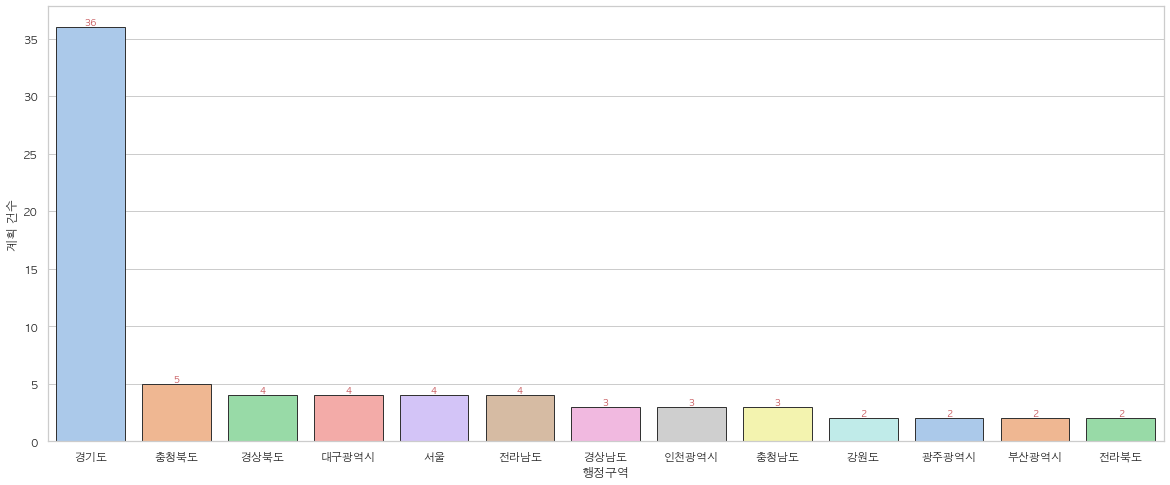

In [36]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

x=single_area_count_df['area_name']
y=single_area_count_df['count']
plt.figure(figsize=(20,8))
for i, v in enumerate(x):
        plt.text(i, round(y[i],2), round(y[i],2),      
                fontsize = 9, 
                color='r',
                horizontalalignment='center',  
                verticalalignment='bottom')

sns.barplot(data = single_area_count_df, 
                x='area_name',
                y='count', 
                palette='pastel',
                edgecolor=".2",
                linewidth=1 
                )

plt.xlabel('행정구역')
plt.ylabel('계획 건수')
plt.show()

# 3) 추후 활용 방안 및 시사점

### 1. 순이동자 수의 감소와 순이동자 건수의 증가는 1인 가구가 증가하는 상황

### 2. 순이동에 영향을 주는 요소로, 아파트 및 연립다세대의 실거래 지수의 경우 높아질수록 순이동 또한 상당한 상관관계를 가짐

### 3. 단독 주택 실거래 지수의 경우 영향이 크지 않음

### 4. 각 행정구역별 1인가구에게 영향을 줄 수 있는 택지(아파트, 연립다세대) 개발 계획을 살펴보면 서울과 경기도권에 집중되어 있음

### 5. 이는 현 시점에서의 전국 인구 분포 대비 주택 개발 계획 비율을 따져 계산했을 때보다 수도권에 많은 택지 개발 계획이 있고, 비수도권 지역의 택지 개발 계획은 미미한 수준


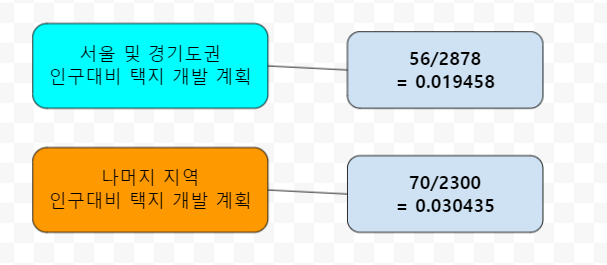

In [37]:
Image('03.png')

# 4) 정부정책 활용 방안

## 비수도권은 개발이 이루어지지 않아서 기회가 점점 줄어드는 악순환이 반복

## - 현재 수도권 중심에 몰려있는 택지 개발 계획을 전국 행정구역별 1인가구 분포를 토대로 다시 계획

## - 타 지역 개발에 증가를 위해 정책적인 방안 논의

## - 비수도권에 관심을 가지고 필요한 곳에 적절한 정책이 시행되어 소외되는 장소를 최소화 하여 전국이 골고루 발전해 나가는 정책 시행

## - 정책시행에 있어 연령, 성별, 그리고 지역과 같은 다양한 요소들을 수치적으로 고려하여 세밀한 정책들이 많이 나와 활용 되었으면 함


## 본 저장물의 저작권은 Apache License v2.0을 따릅니다